In [1]:
import os
import sys
sys.executable
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    

In [2]:
import _sqlite3
from db import db_path
import pandas as pd
import re
print(db_path)
      

ImportError: cannot import name 'db_path'

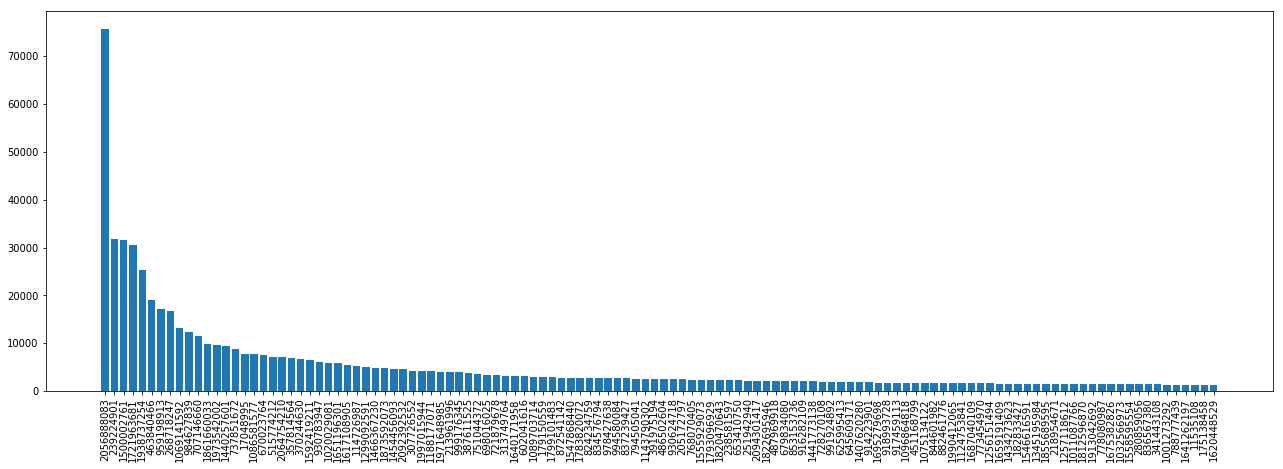

In [47]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

conn = _sqlite3.connect(db_path + '2016_11.db')

start = time.time()
df = pd.read_sql_query("Select city_id from ads", conn)
all_cities = df['city_id'].value_counts()
prob = all_cities[:120].to_dict()
all_cities = all_cities.to_dict()
indexes=np.arange(len(prob))
plt.figure(figsize=(22,7))

plt.bar(indexes,prob.values())
plt.xticks(indexes,prob.keys(),rotation=90)
plt.show()


In [48]:
city = 1640171958
def assign_city_size(city_id):
    ad_count = 1000000
    return all_cities[city_id]/ad_count
print(assign_city_size(city))

0.003187


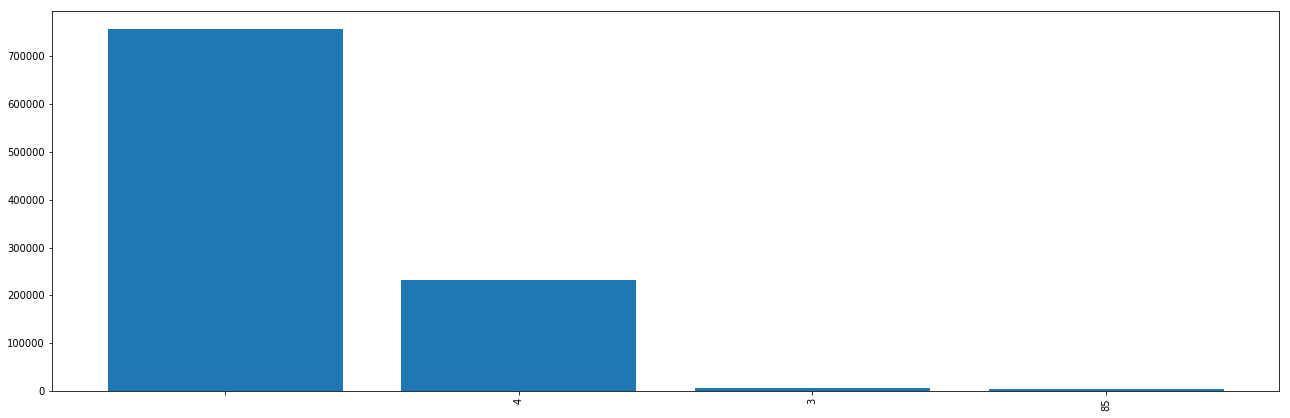

In [52]:

start = time.time()
df = pd.read_sql_query("Select paidads_id_index from ads", conn)
indices = df['paidads_id_index'].value_counts()
prob = indices[:120].to_dict()
indices = indices.to_dict()
indexes=np.arange(len(prob))
plt.figure(figsize=(22,7))

plt.bar(indexes,prob.values())
plt.xticks(indexes,prob.keys(),rotation=90)
plt.show()

In [89]:
categories = pd.read_sql_query("select category_id from categories",conn)
total_hits = categories['category_id'].tolist()
hpc = dict()
hpc.update((k, 0) for k in total_hits)
hpc[0]=0
#print(type(hpc))

queries = pd.read_sql_query("select category_id, session_count from queries",conn)
#print(queries)
for row in queries.itertuples():
    if row[1]!='':
        cat_id = re.sub("[^0-9]", "", row[1])
        #print(row)
        hpc[int(cat_id)]+= int(row[2])

print(hpc)

{3: 0, 4: 0, 5: 0, 6: 0, 11: 0, 14: 843031, 15: 1392294, 16: 35435, 18: 515358, 20: 94595, 22: 8537, 24: 182497, 25: 8316, 32: 0, 49: 0, 53: 0, 56: 0, 62: 0, 64: 0, 65: 0, 80: 0, 81: 0, 82: 0, 84: 0, 85: 0, 87: 0, 88: 0, 93: 0, 99: 0, 100: 0, 101: 0, 103: 0, 111: 0, 124: 0, 125: 21050, 127: 63696, 130: 0, 131: 0, 133: 0, 138: 0, 139: 0, 140: 0, 163: 0, 164: 0, 168: 0, 175: 0, 179: 0, 180: 0, 181: 137595, 182: 962421, 183: 798053, 184: 87500, 185: 76349, 186: 307103, 187: 95894, 188: 477118, 189: 515133, 190: 297796, 191: 169973, 192: 166010, 193: 24896, 194: 214183, 195: 484967, 196: 161416, 197: 225979, 198: 771090, 199: 333839, 200: 437492, 201: 47774, 202: 287555, 203: 321576, 204: 74444, 205: 167250, 206: 407820, 207: 1137742, 208: 212138, 209: 59395, 219: 0, 224: 0, 230: 0, 231: 0, 235: 0, 236: 31749, 237: 21906, 238: 6777, 239: 10543, 240: 7175, 241: 10828, 243: 35716, 244: 24582, 245: 16797, 246: 28520, 247: 14654, 248: 15724, 249: 14954, 250: 26560, 251: 73859, 252: 13689, 253: